# Housing Prices Project (module 70)

## task
Implement One-Hot encoding in your modelling pipeline.

Evaluate your model. Have you improved the performance compared to the last iteration?

As part of your task when completing an iteration, 
- check the performance of the model, 
- tweak as many aspects as you can from the whole pipeline,  (
Optimieren Sie so viele Aspekte wie möglich aus der gesamten Pipeline)9
- explore the predictions that the model outputs in relation to the features you have, and
- gain information that will be useful for future iterations

**Ordinal encoding**
-  Implement Ordinal encoding in your modelling pipeline.
-  � Evaluate your model. Have you improved the performance compared to the last iteration?.

## about Housing
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

CentralAir: Central air conditioning

       N	No
       Y	Yes

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
       -----

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

**rem:**
Unit of measurement is feet


# Imports and Settings

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [2]:
# import data
# data = pd.read_table("data/housing_iteration_0_2_classification.csv", sep=",")
data = pd.read_table("data/housing_iteration_3_classification.csv", sep=",")

# Preprocessing

## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
 10  MSZoning      1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Heating       1460 non-null   object 
 13  Street        1460 non-null   object 
 14  CentralAir    1460 non-null   object 
 15  Foundation    1460 non-null   object 
dtypes: float64(1), int64(9), object(6)
memory usage: 182.6+ KB


In [4]:
data.head(3)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc


## Data Splitting (X & y, train & test)

In [5]:
# delete data with NaNs in "intended y column"
data.dropna(subset=["Expensive"], inplace=True)

# define y (and X)
y = data.pop("Expensive")
X = data

# feature engineering
# X.loc[:, "Cabin"] = X.Cabin.str[0]  # extracting only the first character of each string
# X.loc[X.loc[:, "Heating"] == "Floor", "Heating"] = "N_A"
X['Street'] = X['Street'].replace({'Pave': 1, 'Grvl': 0})
X['CentralAir'] = X['CentralAir'].replace({'Y': 1, 'N': 0})

# ---> INPUTS  <------------------------------------------------------------< INPUTS
seed = 123
split = 0.2

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=seed)

# Modelling Decision Tree

## Preprocessor

In [6]:
# define numerical and categorial branch
num_features = data.select_dtypes(include="number").columns
cat_features = data.select_dtypes(include="object").columns

# define transformers for each branch
num_branch = make_pipeline(SimpleImputer())
cat_branch = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"), OneHotEncoder(handle_unknown="ignore", sparse_output=False)).set_output(transform='pandas')

# create branches for preprocessor
preprocessor = make_column_transformer(
                    (num_branch, num_features),
                    (cat_branch, cat_features))

# from sklearn.compose import ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_branch, num_features),
#         ('cat', cat_branch, cat_features)
#     ], remainder='passthrough')

# preprocessor takes care of the whole column splitting and concatenating
# output of this object will be a Numpy array with all the transformed features (including the newly created one-hot features). 

## Main Pipeline

In [7]:
# Initialize transformers and Model
# scaler = StandardScaler()
# imputer = SimpleImputer()
# encoder = OneHotEncoder()
model = DecisionTreeClassifier()

# Create pipeline
pipe = make_pipeline(preprocessor, model)

### INPUT Grid

In [8]:
param_grid = {
    # 'simpleimputer__strategy':['mean', 'median', 'most_frequent'],
    'columntransformer__pipeline-1__simpleimputer__strategy':['mean', 'median'],     # 1 = num_branch
    # 'standardscaler__with_mean':[True,False],
    # 'standardscaler__with_std':[True,False],
    'decisiontreeclassifier__max_depth': range(2, 10),
    'decisiontreeclassifier__min_samples_leaf': range(5, 15),
    'decisiontreeclassifier__min_samples_split': range(5, 50, 2),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }
folds = 10

## Cross Validation

In [9]:
# create grid search object/cross validation object
valid = GridSearchCV(pipe, param_grid, cv=folds, refit=True, scoring='accuracy', verbose=1)

# fit object to train dataset
valid.fit(X_train, y_train)

Fitting 10 folds for each of 7360 candidates, totalling 73600 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Street',
       'CentralAir'],
      dtype='object')),
                                                                        ('pipeline-2',
                                                                         Pipeline...
                                        DecisionTreeClassifier())]),
             param_grid={'columntransformer__pipeline-1__simpleimputer__strategy': ['mean',
                                                                                    'median'],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 10),
                         'decisiontreeclassifier__min_samples_leaf': range(5, 15),
                         'decisiontreeclassifier__min_samples_split': range(5, 50, 2)},
             scoring='accuracy', verbose=1)

In [10]:
(pipe
 .named_steps#.Pipeline
 # .named_steps.columntransformer
 # .named_transformers_["pipeline-2"]
)

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer())]),
                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
        'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Street',
        'CentralAir'],
       dtype='object')),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(fill_value='N_A',
                                                                 strategy='constant')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse_output=False))]),
                        

In [11]:
# how to access the tree in the pipeline:
# valid.best_estimator_.named_steps.decisiontreeclassifier

In [12]:
valid.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer())]),
                                    Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
          'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Street',
          'CentralAir'],
         dtype='object')),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='N_A',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
     

## Quality Check

In [13]:
valid.best_params_

{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 35}

In [14]:
# the mean cross-validated score of the best estimator
valid.best_score_

0.9212275272620101

In [15]:
valid.best_estimator_['decisiontreeclassifier'].feature_importances_

array([0.03256816, 0.02092818, 0.22547202, 0.02454358, 0.14545409,
       0.        , 0.44790947, 0.02575548, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02314442, 0.        ,
       0.        , 0.        , 0.01243537, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02312574, 0.01866349, 0.        ,
       0.        , 0.        ])

In [25]:
preprocessor.get_feature_names_out()

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [24]:
valid.feature_names_in_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_names_in_'

In [17]:
# which features have been used to build the tree
valid.best_estimator_.named_steps.decisiontreeclassifier

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=35)

# Evaluation (Test Data

## Accuracy

In [18]:
# train-accuracy
y_train_pred = valid.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

In [19]:
# test-accuracy
y_test_pred = valid.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

In [20]:
# check for overfitting
delta = train_acc - test_acc
print(delta, train_acc, test_acc)

0.03339041095890416 0.9409246575342466 0.9075342465753424


## Plotting Decision Tree

In [21]:
# we also need the column names for the features that have been passed to the decision tree
columns_after_preprocessing = (
    valid.best_estimator_.named_steps.columntransformer.named_transformers_["pipeline-1"].get_feature_names_out().tolist()
    +
    valid.best_estimator_.named_steps.columntransformer.named_transformers_["pipeline-2"].get_feature_names_out().tolist()
    )
# columns_after_preprocessing

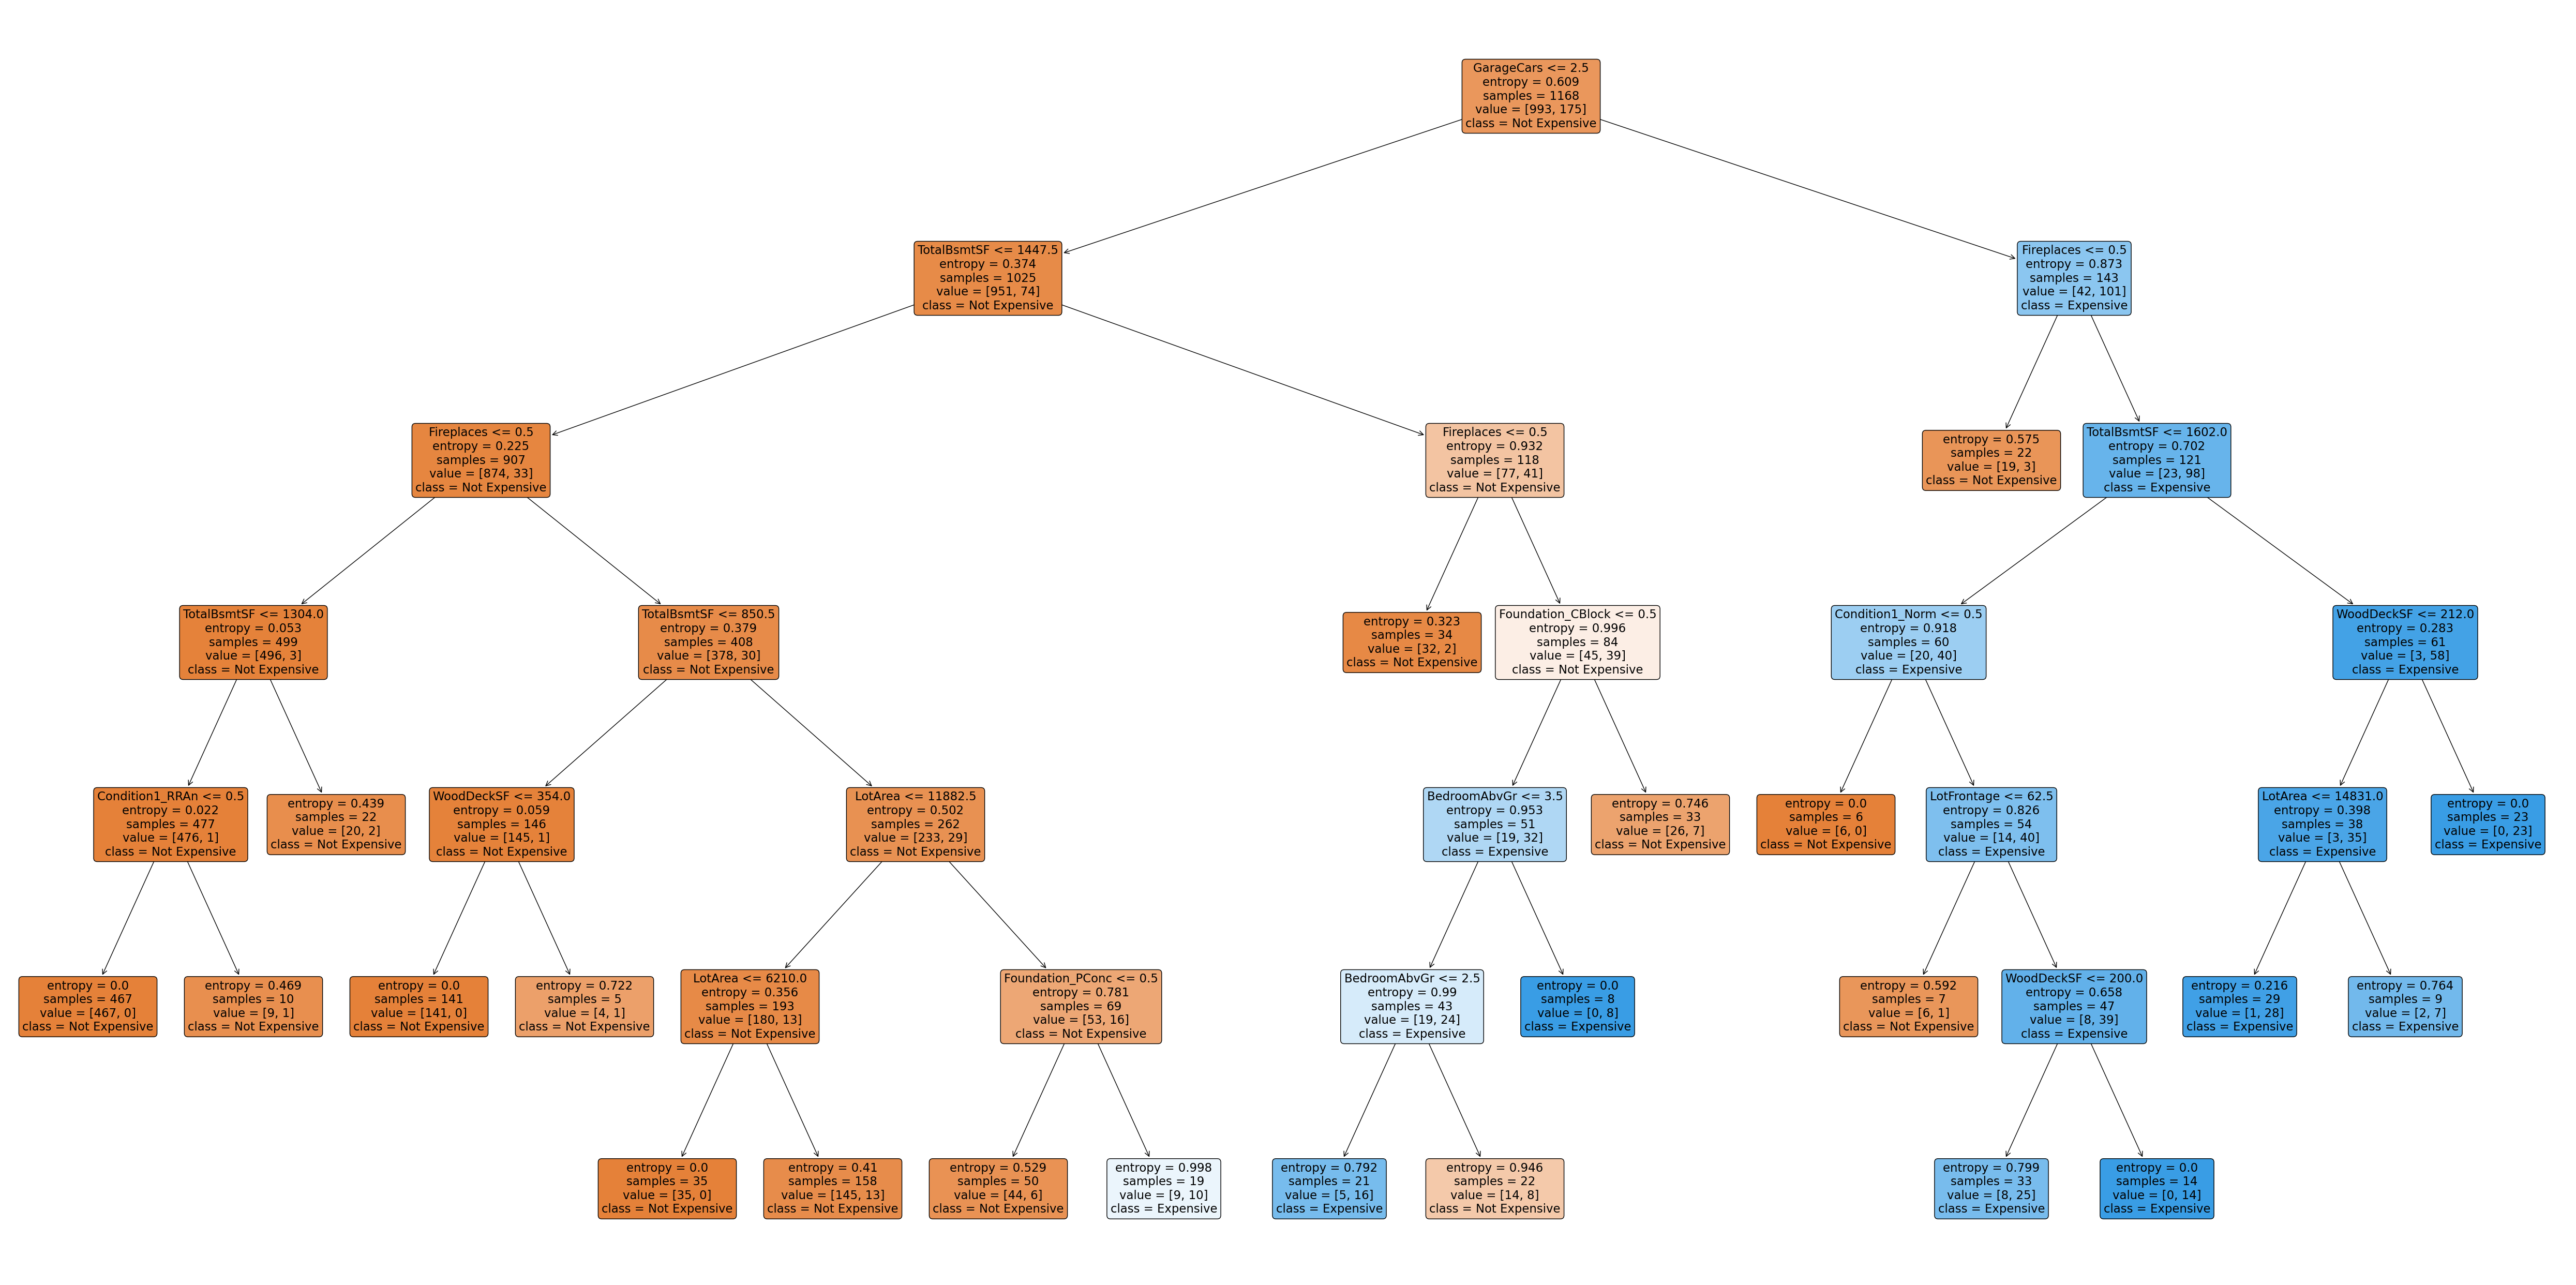

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     valid.best_estimator_['decisiontreeclassifier'],
     filled=True,
     rounded=True,
     class_names=['Not Expensive','Expensive'],
     feature_names=columns_after_preprocessing
     );